## Targeted Marketing Campaign - Build and Ensemble Model
## Author - Catalina Ifrim

In [ ]:
"""
UW DATASCI420-Machine Learning Techniques
L06-Random_Forest

"""

### Instructions

Cypress from New Ventures Department has found a banking client who wants to do a targeted marketing campaign for a specialty
investment product to some of its customers. Cypress stresses that the bank only wants to spend the effort on customers who 
are likely to say yes; last year they used a different company to generate an algorithm and ended up spamming many of their 
customers with products they didn't want.

Using the 'Bank Data' csv file, create a new notebook to **train, test, and evaluate** an **ensemble model**. Perform each of the 
following tasks and answer the related questions:

1. Read in, parse, and pre-process the data
2. Perform a brief exploratory analysis
3. **Compare the performance between a decision tree and a random forest approach by assessing the accuracy of each model**
4. Graph the structure of your decision tree
5. Graph the confusion matrix of your random forest model

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import category_encoders as ce
from sklearn.model_selection import train_test_split 
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn import tree
from sklearn.metrics import *
from sklearn.preprocessing import *

%matplotlib inline

### 1. Read data

In [2]:
# Read the dataset as pandas dataframe
bank = pd.read_csv("Bank Data.csv")

print(bank.shape)
bank.head()

(600, 11)


,age,sex,region,income,married,children,car,save_act,current_act,mortgage,pep
0,48,FEMALE,INNER_CITY,17546.0,NO,1,NO,NO,NO,NO,YES
1,40,MALE,TOWN,30085.1,YES,3,YES,NO,YES,YES,NO
2,51,FEMALE,INNER_CITY,16575.4,YES,0,YES,YES,YES,NO,NO
3,23,FEMALE,TOWN,20375.4,YES,3,NO,NO,YES,NO,NO
4,57,FEMALE,RURAL,50576.3,YES,0,NO,YES,NO,NO,NO


In [3]:
# Check the datatype
bank.dtypes

age              int64
sex             object
region          object
income         float64
married         object
children         int64
car             object
save_act        object
current_act     object
mortgage        object
pep             object
dtype: object

In [ ]:
# Check all columns for NaNs or missing values

#(bank.astype (np.object) == "?").any()
#bank.isnull().sum()

The bank dataset contains 600 observations and 11 attributes. The label is the attribute 'pep' which means banking promotion.
The label is of categorical type and has two values, 'Yes' and 'No'. Most of the attributes in the Bank dataset are also 
categorical except 'age', 'income' and 'children' which are of integer and float types. It can be observed that all categorical 
variables have only two categories, only 'region' has four categories. The dataset has no missing values.

Next it is performed a brief exploratory analysis to understand relationships between variables and between 
variables and the label.

### 2. Brief exploratory analysis

To visualize the distribution of the variables and the relationships between them were used bar plots, KDE and scatter plots, 
and boxplots. Bar plots were used to display the frequency of unique values of a categorical variable. Below it is displayed 
the distribution of the label 'pep'.

Text(0.5, 1.0, 'Bar plot pep variable')

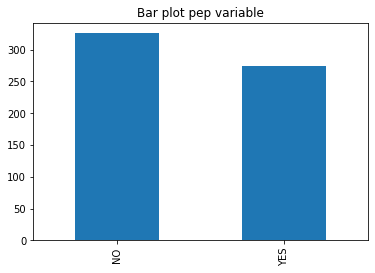

In [4]:
# Check distribution of target variable
bank.pep.value_counts().plot(kind='bar')
plt.title("Bar plot pep variable")

The bar plot of label shows the counts of "Yes" values being just slightly lower then the counts of "No" values. <br>

Other bar plots for 'car', 'save_acc', 'current_acc' showed also almost equal distributions for 'Yes' and 'No' categories.
The bar plot for 'mortgage' displayed a frequency almost double for customers with no mortgage comparing with
customers that have a mortgage.

There were also used bar plots for grouped categories. To plot those, it was added a column 'counts' to the dataframe, 
then were used groupby() and agg() functions to plot the variable grouped by counts. Below it is displayed the plot of the 
variable 'region' grouped by counts.

Text(0.5, 1.0, 'Bar plot region')

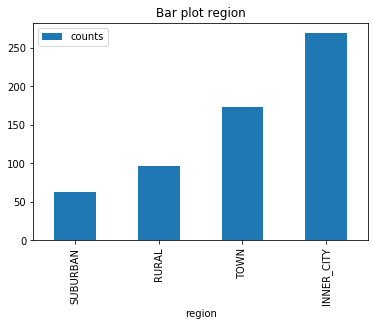

In [5]:
# Add a column counts to dataframe
bank['counts'] = 1

# Bar plot of region grouped by counts
bank.loc[:, ['region', 'counts']].groupby(['region']).agg('count').sort_values('counts').plot.bar()
plt.title("Bar plot region")

# Bar plot of children grouped by counts
#bank.loc[:, ['children', 'counts']].groupby(['children']).agg('count').sort_values('counts').plot.bar()
#plt.title("Bar plot children")

The bar plot of 'region' grouped by counts shows the lowest frequency for Suburban region, followed by Rural, Town and 
Inner_City with the highest counts. <br>

The bar plot of 'children' attribute, shows the higher counts for families with no children and the lower counts for families 
with 3 children. In between are the families with 1 and 2 children with equal frequency.

Next it is plotted the distribution of 'income' using a KDE plot.

Text(0, 0.5, 'Density')

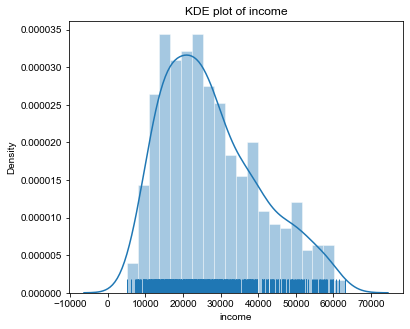

In [6]:
# KDE plot of income

fig = plt.figure(figsize=(6,5))             # Define plot area
ax = fig.gca()                              # Define axis 
sns.set_style("whitegrid")
sns.distplot(bank.loc[:, 'income'], bins = 20, rug=True, hist = True)
ax.set_title('KDE plot of income')    # Give the plot a main title
ax.set_xlabel('income')               # Set text for the x axis
ax.set_ylabel('Density')                    # Set text for y axis

The KDE plot of income shows a slightly right skewed distribution with a mean value at ~28000-30000 and with the right tail 
going over 70000.

Boxplots are very useful when the data is grouped using another variable. Such a boxplot is displayed below, showing the 
income by region.

(0.0, 70000.0)

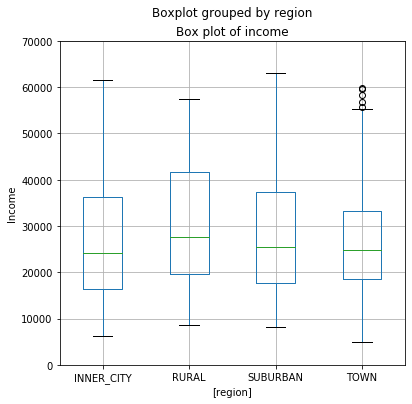

In [6]:
# Boxplot of income by region

fig = plt.figure(figsize=(6, 6))                    # Define plot area
ax = fig.gca()                                      # Define axis 
bank.loc[:,['income', 'region']].boxplot(by = 'region', ax = ax)
ax.set_title('Box plot of income')                  # Give the plot a main title
ax.set_ylabel('Income')                             # Set text for y axis
ax.set_ylim(0.0, 70000.0)                           # Set the limits of the y axis

# Boxplot of income by save_act

#fig = plt.figure(figsize=(5, 5))                   # Define plot area
#ax = fig.gca()                                     # Define axis 
#bank.loc[:,['income', 'save_act']].boxplot(by = 'save_act', ax = ax)
#ax.set_title('Box plot of income')                 # Give the plot a main title
#ax.set_ylabel('Income')                            # Set text for y axis
#ax.set_ylim(0.0, 70000.0)                          # Set the limits of the y axis

The boxplot of income by region shows that there is a small difference in median values of income for different regions. The
median is higher for Rural region. Also, the Town region shows some outliers. 

(0, 70)

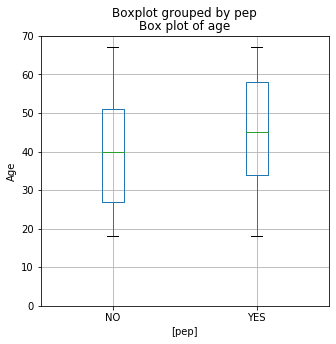

In [7]:
# Boxplot of age by pep

fig = plt.figure(figsize=(5, 5))                     # Define plot area
ax = fig.gca()                                       # Define axis 
bank.loc[:,['age', 'pep']].boxplot(by = 'pep', ax = ax)
ax.set_title('Box plot of age')                      # Give the plot a main title
ax.set_ylabel('Age')                                 # Set text for y axis
ax.set_ylim(0, 70)                                   # Set the limits of the y axis

From the boxplot of age by pep, we can see that the median age of customers who are likely to say Yes to banking promotions is 
higher than the median age of customers that say No.<br>

Below it is displayed the scatter plot of income versus age. 

Text(0.5, 0, 'Age')

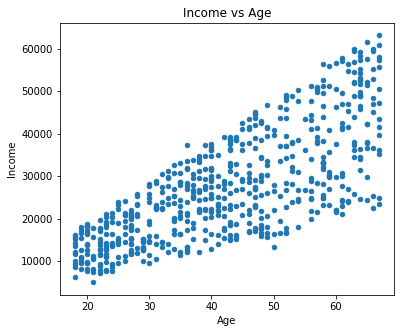

In [8]:
# Scatter plot of income vs age

ax = plt.figure(figsize=(6, 5)).gca()    # define axis
bank.plot.scatter(x = 'age', y = 'income', ax = ax)
ax.set_title('Income vs Age')            # Give the plot a main title
ax.set_ylabel('Income')                  # Set text for y axis
ax.set_xlabel('Age')

The scatter plot of income vs age shows a highly positive correlation between those variables. <br>

In the next step, the features are prepared by encoding and scaling so they can be used for building the classification models. 
The column 'counts', used for visualizations of the bar plots of variables grouped by counts it is deleted from the dataframe.

In [9]:
# Drop the column counts from the bank dataframe
bank = bank.drop(['counts'], axis=1)

#bank.head()

### Pre-process the data

The label 'pep' contains two string categories "Yes" and "No" which will be replaced with integer values 1 (Yes) and 0 (No).

In [10]:
# Replace string with numeric in pep column
bank['pep']=bank['pep'].map({'YES':1,'NO':0})

#bank.head()

Next are created the features and target sets from the initial bank dataframe.

#### Create features and target dataframes

In [11]:
# Create the features
X = bank.iloc[:,0:10]
# Create the target
y = bank.iloc[:,10]

#X.head()

The categorical features in X dataframe are one hot encoded using ce.OneHotEncoder from sklearn category_encoders library. 
For the ce.OneHotEncoder, the parameter 'return_df' is set to True, so it will be returned a pandas dataframe. Also, since no 
parameter 'cols' (list of columns) is passed to the ce.OneHotEncoder, every non-numeric column will be converted. It is used 
also the parameter 'use_cat_names' which if True, the category values are included in the encoded column names (for example
"car_YES" and "car_NO"). This will be helpful when visualizing the decision tree from the Random Forest model to see 
the splitting criterion at each node.

#### Encode category columns using OneHotEncoder

In [12]:
# Create the encoder
le =  ce.OneHotEncoder(return_df=True, use_cat_names=True)
# Transform data
X_encoded = le.fit_transform(X)

X_encoded.head()

,age,sex_FEMALE,sex_MALE,region_INNER_CITY,region_TOWN,region_RURAL,region_SUBURBAN,income,married_NO,married_YES,children,car_NO,car_YES,save_act_NO,save_act_YES,current_act_NO,current_act_YES,mortgage_NO,mortgage_YES
0,48,1,0,1,0,0,0,17546.0,1,0,1,1,0,1,0,1,0,1,0
1,40,0,1,0,1,0,0,30085.1,0,1,3,0,1,1,0,0,1,0,1
2,51,1,0,1,0,0,0,16575.4,0,1,0,0,1,0,1,0,1,1,0
3,23,1,0,0,1,0,0,20375.4,0,1,3,1,0,1,0,0,1,1,0
4,57,1,0,0,0,1,0,50576.3,0,1,0,1,0,0,1,1,0,1,0


The first few rows from X dataframe show that all categorical columns were one hot encoded, except numerical columns 'age', 
'income' and 'children'. The column 'children' contains small values between 0 and 3. The columns 'age' and 'income' will be 
scaled using min-max normalization.

#### Scale income and age variables

In [13]:
# MinMax normalization column 'income'

# Create a new dataframe using the column 'income'
income = X_encoded.loc[:, ["income"]]
# Apply the Min-Max normalization
minmax_scale = MinMaxScaler().fit(income)
scaled_income = minmax_scale.transform(income)
# Add the column with normalized values for income to X_encode dataframe
X_encoded["income"] = scaled_income

# MinMax normalization column 'age'

# Create a new dataframe using the column 'income'
age = X_encoded.loc[:, ["age"]]
# Apply the Min-Max normalization
minmax_scale = MinMaxScaler().fit(age)
scaled_age = minmax_scale.transform(age)
# Add the column with normalized values for income to X_encode dataframe
X_encoded["age"] = scaled_age

In [14]:
print(X_encoded.shape)
#X_encoded.head()

(600, 19)


After encoding categories and scaling numeric variables, the dataframe X_encoded contains 19 features. Next the dataset is split
into training (70%) and testing (30%) sets.

#### Split the Training and Testing Data

In [15]:
# Split the dataset into training set (70%) and testing set (30%)
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.3, random_state=123)

# Print the shape of the training and testing datasets
print('X_train: ', X_train.shape)
print('y_train: ', y_train.shape)
print('X_test: ', X_test.shape)
print('y_test: ', y_test.shape)

X_train:  (420, 19)
y_train:  (420,)
X_test:  (180, 19)
y_test:  (180,)


### 3. Compare the performance between a Decision Tree model and a Random Forest model by assessing the accuracy

Using the training and testing sets are build a Decision Tree Classifier and a Random Forest Classifier.

#### Build a Decision Tree model

The hyperparameters used for bulding the Decision Tree model are max_depth=5 and min_samples_leaf=5. After getting 
the predictions for testing set it is calculated and displayed the accuracy score.

In [16]:
# Generate Decision Tree Classifier

# Use hyperparameters max_depth and min_samples_leaf
dec_tree = DecisionTreeClassifier(max_depth=5, min_samples_leaf=5)                               
model_dt = dec_tree.fit(X_train,y_train)

# Validate the DT model
y_pred_dt = model_dt.predict(X_test)  

# Calculate accuracy for DT
dt_accuracy = accuracy_score(y_test, y_pred_dt)*100
# Print Accuracy score
print("Accuracy Decision Tree: %.2f%%"%dt_accuracy)

Accuracy Decision Tree: 82.22%


The Decision Tree model has a high accuracy score of 82.22%.

#### Build a Random Forest model

For generating the Random Forest model were used the following hyperparameters: 
- nTrees = 30 - Following the rule of thumb for classification, the number of trees to start with was set to the square root 
of the number of observations. There are 600 observations in the dataset, so the initial number of trees was set to 24.
The number of trees was then increased to 30 based on model performance.
- max_depth = 5  - for control overfitting
- min_node_size = 5  - stop splitting the node if the number of observations in that node is already 5

After the model is trimmed, the model is applied to predict the testing data, then evaluated by calculating
the accuracy score.

In [17]:
# Generate Random Forest Classifier

nTrees = 30
max_depth = 5           
min_node_size = 5       
verbose = 0

rf = RandomForestClassifier(n_estimators=nTrees, max_depth=max_depth, random_state=0, verbose=verbose, min_samples_leaf=min_node_size)
rf.fit(X_train, y_train)  
# print feature importance
#print(rf.feature_importances_)

y_pred_rf = rf.predict(X_test)               # call predict function on test dataset

# Compare the true label and the predict label on the accuracy
rf_accuracy = [1 for i in range(len(y_pred_rf)) if y_test.iloc[i] == y_pred_rf[i]]
# Calculate Accuracy
rf_accuracy = round(float(np.sum(rf_accuracy))/len(y_pred_rf)*100,2)
print("Accuracy Random Forest: %.2f%%"%rf_accuracy)

Accuracy Random Forest: 86.67%


The **Random Forest** model has an accuracy score of almost **87%**, significantly improved from the accuracy 
of the **Decision Tree** model of **82.22%**.

### 4. Graph the structure of the Decision Tree model

Below it is visualized the final decision tree in the Random Forest model. The code below displayes the list of features that is
used for visualizing the tree.

In [18]:
# Get the column names
colnames = X_encoded.columns

# Print the list of columns in the features dataframe
colnames                    

Index(['age', 'sex_FEMALE', 'sex_MALE', 'region_INNER_CITY', 'region_TOWN',
       'region_RURAL', 'region_SUBURBAN', 'income', 'married_NO',
       'married_YES', 'children', 'car_NO', 'car_YES', 'save_act_NO',
       'save_act_YES', 'current_act_NO', 'current_act_YES', 'mortgage_NO',
       'mortgage_YES'],
      dtype='object')

[Text(697.5, 996.6, 'income <= 0.841\ngini = 0.495\nsamples = 256\nvalue = [230, 190]\nclass = age'),
 Text(610.3125, 815.4000000000001, 'age <= 0.01\ngini = 0.485\nsamples = 243\nvalue = [230, 163]\nclass = age'),
 Text(523.125, 634.2, 'gini = 0.0\nsamples = 5\nvalue = [13, 0]\nclass = age'),
 Text(697.5, 634.2, 'current_act_YES <= 0.5\ngini = 0.49\nsamples = 238\nvalue = [217, 163]\nclass = age'),
 Text(348.75, 453.0, 'region_TOWN <= 0.5\ngini = 0.469\nsamples = 54\nvalue = [55, 33]\nclass = age'),
 Text(174.375, 271.79999999999995, 'region_INNER_CITY <= 0.5\ngini = 0.5\nsamples = 41\nvalue = [34, 32]\nclass = age'),
 Text(87.1875, 90.59999999999991, 'gini = 0.454\nsamples = 16\nvalue = [15, 8]\nclass = age'),
 Text(261.5625, 90.59999999999991, 'gini = 0.493\nsamples = 25\nvalue = [19, 24]\nclass = sex_FEMALE'),
 Text(523.125, 271.79999999999995, 'mortgage_YES <= 0.5\ngini = 0.087\nsamples = 13\nvalue = [21, 1]\nclass = age'),
 Text(435.9375, 90.59999999999991, 'gini = 0.153\nsamples

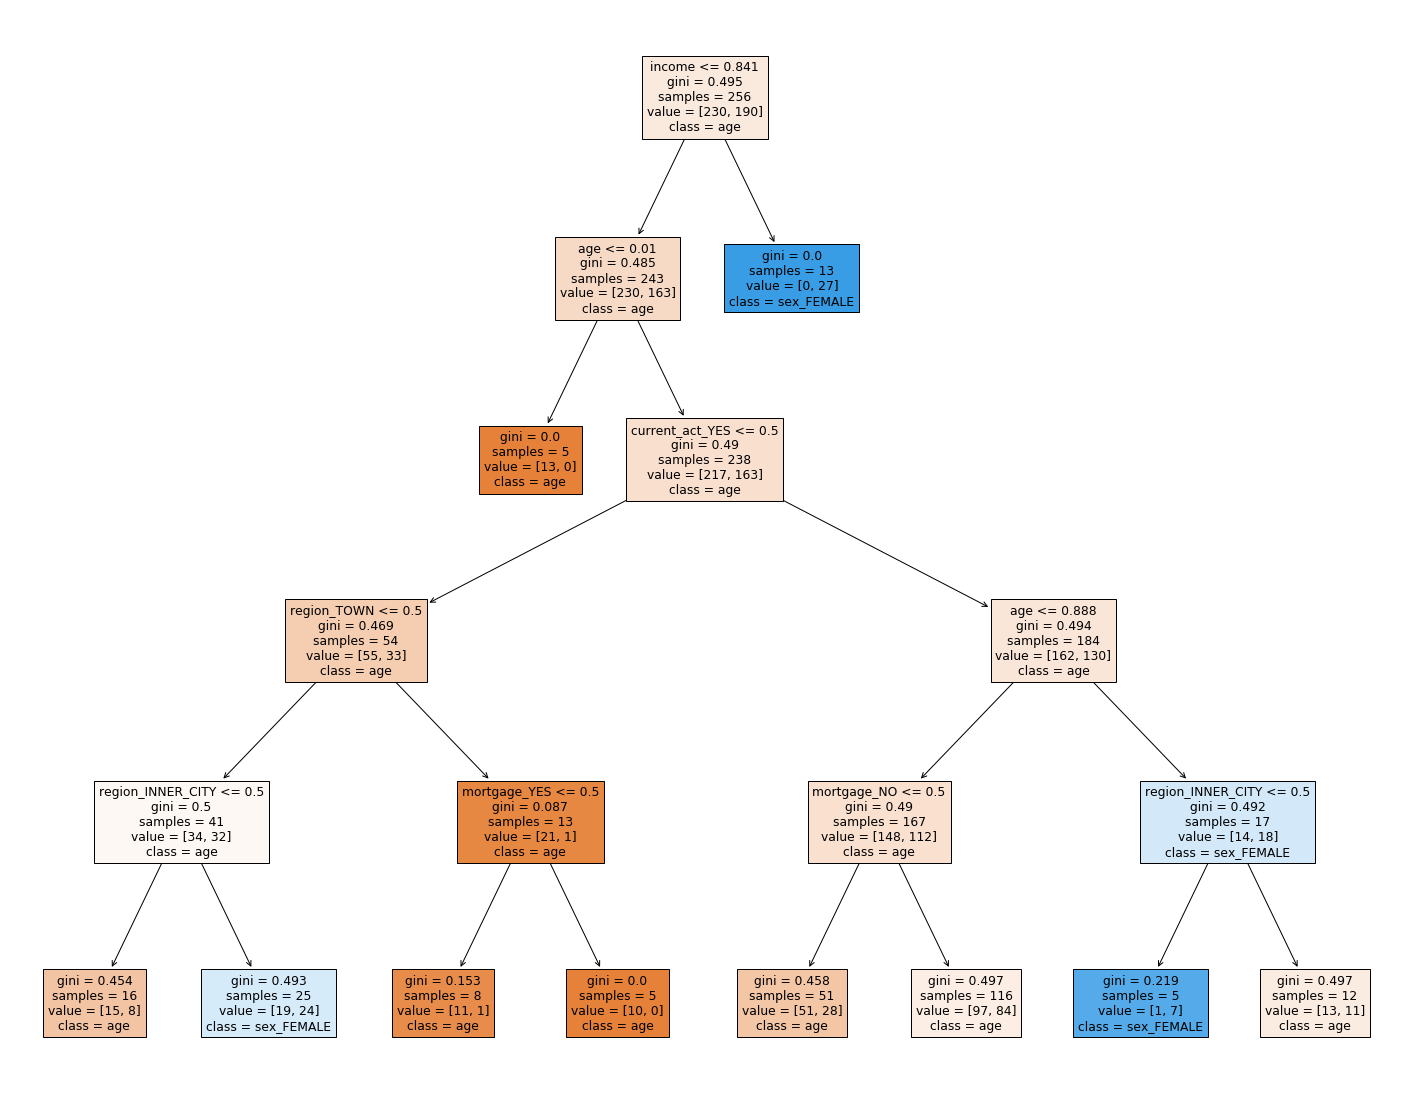

In [19]:
# Plot visualization of the final Random Forest decision tree

fig = plt.figure(figsize=(25,20))
tree.plot_tree(rf.estimators_[29],          # final decision tree in the Random Forest model
               feature_names = colnames, 
               class_names=colnames,
               filled = True)

The most predictive feature for the final decision tree in the Random Forest model is income that starts at the top of the 
tree. Age is the next criterion selected for the positive side of the tree which splits on current_act. The current_act
continues the split on criterion region_Town and age again. The last split, at a depth of 5 as specified with the max_depth 
hyperparameter, is on the region_Inner_City and mortgage. 

### 5. Graph the Confusion Matrix of the Random Forest model

Below it is calculated and visualized the Confusion Matrix for the Random Forest model.

In [20]:
# Confusion Matrix for Random Forest model

CM = confusion_matrix(y_test, y_pred_rf)
print ('\nConfusion Matrix for Random Forest model:\n ', CM)
tn, fp, fn, tp = CM.ravel()
print ("\nTP, TN, FP, FN:", tp, ",", tn, ",", fp, ",", fn)


Confusion Matrix for Random Forest model:
  [[87  7]
 [17 69]]

TP, TN, FP, FN: 69 , 87 , 7 , 17


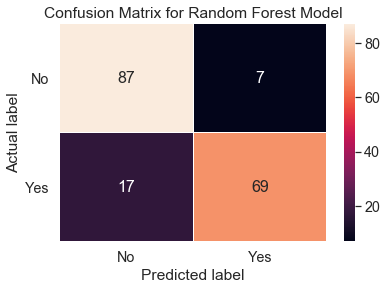

In [21]:
# Build the Confusion Matrix plot for Random Forest model

plt.figure(figsize=(6,4))
sns.set(font_scale=1.3)            
sns.heatmap(CM, annot=True, annot_kws={"size": 16}, linewidths=0.2) 

class_names = ['No', 'Yes']
tick_marks = np.arange(len(class_names))
tick_marks2 = tick_marks + 0.5
plt.xticks(tick_marks2, class_names, rotation=0)
plt.yticks(tick_marks2, class_names, rotation=0)
plt.xlabel('Predicted label')
plt.ylabel('Actual label')
plt.title('Confusion Matrix for Random Forest Model')
plt.show()

The True Positives predicted is 69 and the True Negatives is 87, the False Negatives is 17 and the False Positives is 7.<br>
The model misclassified **17 customers  as False Negatives**. These are **customers who actually want to get a bank promotion** 
but the **model predicted that they do not want one**, so **these customers will not get promotion emails**.

The number of **False Positives is fairly small** (7), and it **represents the customers who do not want to get promotion emails**,
but the **algorithm predicted that they want to**. So, this is the number of **customers that will be spammed with products
they do not want**.